In [1]:
#Altın fiyatının nereye gittiğini tahmin etmek mümkün mü?

#Evet, en önemli değerli metallerden biri olan Altın'ın fiyatını tahmin etmek için makine öğrenimi regresyon tekniklerini kullanalım.

#Geçmiş Altın ETF (GLD) fiyatlarından bilgi alan ve ertesi gün bir Altın fiyat tahmini döndüren bir makine öğrenimi doğrusal regresyon modeli oluşturacağız.

#GLD, doğrudan fiziksel altına yatırım yapan en büyük ETF'dir. ( Kaynak )

#Python'da makine öğrenimini kullanarak altın fiyatlarını tahmin etme yolculuğumuzda aşağıdaki konuları ele alacağız .

#Kitaplıkları içe aktarın ve Gold ETF verilerini okuyun
#Açıklayıcı değişkenleri tanımlayın
#Bağımlı değişkeni tanımla
#Verileri tren ve test veri setine ayırın
#Doğrusal bir regresyon modeli oluşturma
#Altın ETF fiyatlarını tahmin edin
#Kümülatif getirileri çizme
#Günlük hareketleri tahmin etmek için bu model nasıl kullanılır

import pandas as pd
import numpy as np
import pymongo
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from sklearn.linear_model import LinearRegression

myclient = pymongo.MongoClient("mongodb://localhost:27017")

mydb = myclient["goldadata"]

mycol = mydb["golddata"]

deger = mycol.find() 

list_deger = list(deger)

df = pd.DataFrame(list_deger)

In [2]:
df.head()

""


In [6]:
df.set_index("Tarih", inplace=True)

In [7]:
print('Null Values:',df.isnull().values.sum())

Null Values: 0


In [8]:
print('NA values:',df.isnull().values.any())

NA values: False


In [9]:
df.head()

,_id,Şimdi,Açılış,Yüksek,Düşük,Hac,Fark %
Tarih,,,,,,,
11.01,63bebd6f2de5200d084f3b7d,1.133,1.134,1.139,1.130,{},0
10.01,63bebd6f2de5200d084f3b7e,1.134,1.128,1.135,1.126,{},0
9.01,63bebd6f2de5200d084f3b7f,1.128,1.128,1.135,1.127,{},0
8.01,63bebd702de5200d084f3b80,1.128,1.125,1.128,1.125,{},0
6.01,63bebd702de5200d084f3b81,1.125,1.106,1.131,1.105,{},1


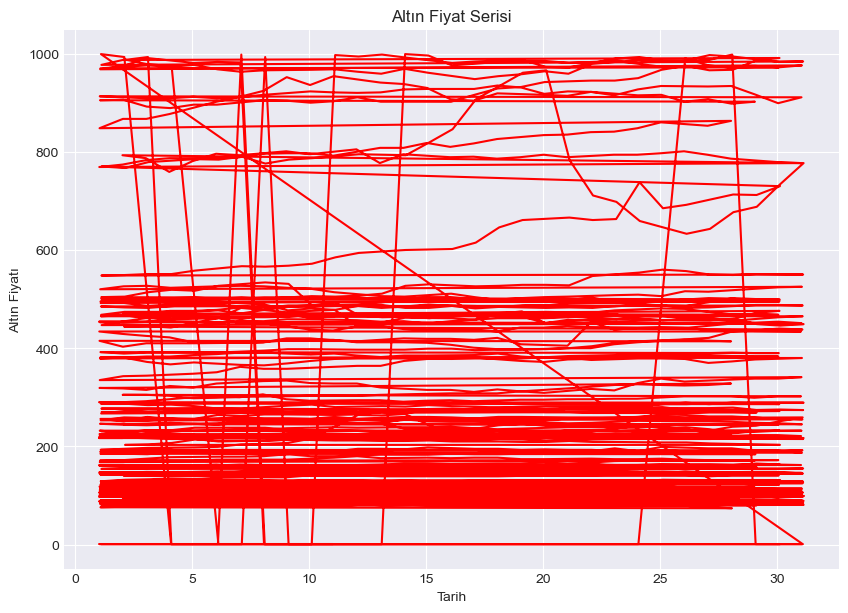

In [11]:
#İlgili olmayan sütunları kaldırıyoruz ve dropna() 
#işlevini kullanarak NaN değerlerini düşürüyoruz. 
#Ardından Gold ETF kapanış fiyatını çiziyoruz.

df = df[['Açılış']]
# Drop rows with missing values
df = df.dropna()

# Plot the closing price of GLD
df.Açılış.plot(figsize=(10, 7),color='r')
plt.ylabel("Altın Fiyatı")
plt.title("Altın Fiyat Serisi")
plt.show()

In [16]:
#Açıklayıcı değişkenleri tanımlayın
#Açıklayıcı değişken, ertesi gün Altın ETF fiyatının değerini belirlemek için
#manipüleedilen bir değişkendir. Basitçe, Gold ETF fiyatını tahmin etmek için 
#kullanmak istediğimiz özelliklerdir.

#Bu stratejideki açıklayıcı değişkenler, son 3 gün ve 9 günün hareketli 
#ortalamalarıdır.NaN değerlerini dropna() işlevini kullanarak
#düşürüyoruz ve özellik değişkenlerini X'te saklıyoruz.

#Ancak X'e Gold ETF fiyatlarını tahmin etmede faydalı olduğunu düşündüğünüz 
#daha fazla değişken ekleyebilirsiniz. Bu değişkenler teknik göstergeler, 
#Gold miners ETF (GDX) veya Oil ETF (USO) 
#gibi başka bir ETF'nin fiyatı veya ABD ekonomik verileri olabilir.

#Bağımlı değişkeni tanımla
#Benzer şekilde bağımlı değişken, açıklayıcı değişkenlerin değerlerine bağlıdır.
#Basitçe söylemek gerekirse, tahmin etmeye çalıştığımız Altın ETF fiyatıdır.
#Altın ETF fiyatını y cinsinden saklarız.

df['S_3'] = df['Açılış'].rolling(window=3).mean()
df['S_9'] = df['Açılış'].rolling(window=9).mean()
df['sonraki_gün_fiyatı'] = df['Açılış'].shift(-1)

df = df.dropna()
X = df[['S_3', 'S_9']]

# Define dependent variable
y = df['sonraki_gün_fiyatı']

In [20]:
#Verileri eğitim ve test veri setine ayırın
#Bu adımda, öngörücüleri ve çıktı verilerini eğitim ve test verilerine ayırıyoruz. Eğitim verileri , girdiyi beklenen çıktıyla eşleştirerek doğrusal regresyon modelini oluşturmak için kullanılır.

#Test verileri, modelin ne kadar iyi eğitildiğini tahmin etmek için kullanılır.

#Verilerin ilk %80'i eğitim için, geri kalan veriler ise test için kullanılır.
#X_train ve y_train, eğitim veri kümesidir
#X_test ve y_test, test veri kümesidir

# Split the data into train and test dataset
#t = .8
#t = int(t*len(df))

# Train dataset
#X_train = X[:t]
#y_train = y[:t]

# Test dataset
#X_test = X[t:]
#y_test = y[t:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
#Doğrusal bir regresyon modeli oluşturma
#Şimdi doğrusal bir regresyon modeli oluşturacağız. 
#Ancak, doğrusal regresyon nedir?

#'x' ve 'y' değişkenleri arasında, 'y'nin gözlenen değerlerini 
#'x'in gözlenen değerleri cinsinden "en iyi" açıklayan matematiksel bir ilişkiyi,
#bir dağılım grafiğinden bir çizgi yerleştirerek yakalamaya çalışırsak, 
#o zaman böyle bir denklem x ve y arasındaki doğrusal regresyon analizi denir.

#Daha fazla parçalamak için, regresyon bağımlı bir değişkendeki
#değişimi bağımsız değişkenler açısından açıklar.
#Bağımlı değişken - 'y' tahmin etmek istediğiniz değişkendir. 
#Bağımsız değişkenler - 'x', bağımlı değişkeni tahmin etmek için
#kullandığınız açıklayıcı değişkenlerdir. Aşağıdaki regresyon denklemi 
#bu ilişkiyi açıklar:

#Ardından, regresyon için katsayı ve sabit oluşturmak üzere
#bağımsız ve bağımlı değişkenleri (x'ler ve y'ler) sığdırmak için 
#fit yöntemini kullanırız.

# Doğrusal bir regresyon modeli oluşturma
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Altın Fiyatı (y) = %.2f * 3 Günlük Hareketli Ortalama (x1) \
+ %.2f * 9 Günlük Hareketli Ortalama (x2) \
+ %.2f (sabit)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Altın Fiyatı (y) = 1.08 * 3 Günlük Hareketli Ortalama (x1) + -0.12 * 9 Günlük Hareketli Ortalama (x2) + 10.33 (sabit)


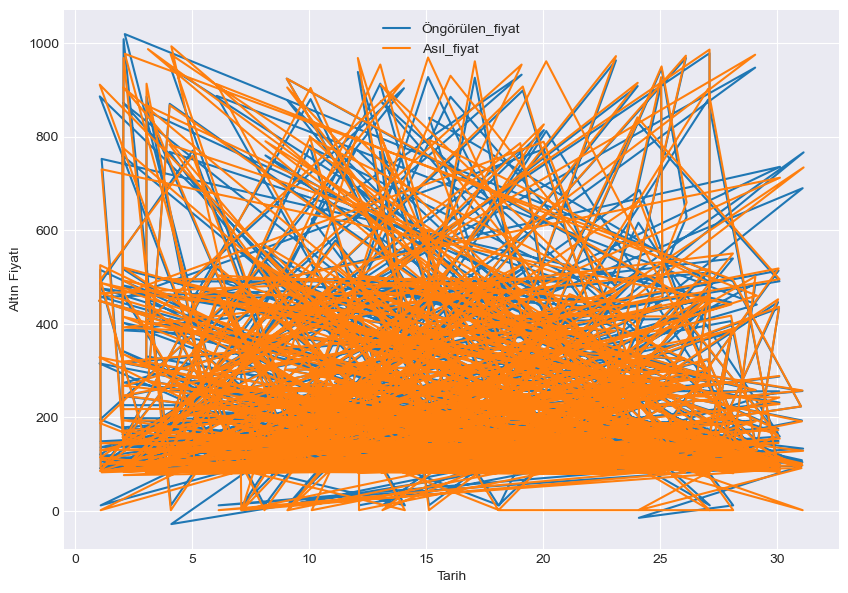

In [26]:
#Altın ETF fiyatlarını tahmin edin
#Şimdi, modelin test veri setinde çalışıp çalışmadığını kontrol etme zamanı.
#Eğitim veri seti kullanılarak oluşturulan doğrusal modeli kullanarak 
#Altın ETF fiyatlarını tahmin ediyoruz. Tahmin yöntemi, 
#verilen X açıklayıcı değişkeni için Altın ETF fiyatını (y) bulur.

# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['Şimdi'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['Öngörülen_fiyat', 'Asıl_fiyat'])
plt.ylabel("Altın Fiyatı")
plt.show()
#Grafik, Gold ETF'nin tahmini ve gerçek fiyatını gösterir.

In [27]:
#score() işlevini kullanarak uyumun iyiliğini hesaplayalım.
# R square
r2_score = linear.score(X_test, y_train)*100
float("{0:.2f}".format(r2_score))
#Görüldüğü gibi modelin R-kare değeri %99,35'dir.
#R-kare her zaman %0 ile %100 arasındadır.
#%100'e yakın bir puan, modelin Altın ETF fiyatlarını iyi açıkladığını gösterir.

ValueError: Found input variables with inconsistent numbers of samples: [2376, 595]

In [30]:
#Kümülatif getirileri çizme
#Performansını analiz etmek için bu stratejinin kümülatif getirilerini 
#hesaplayalım.

#1-Kümülatif getirileri hesaplama adımları aşağıdaki gibidir:
#2-Altın fiyatının günlük yüzde değişimini oluştur
#3-Bir sonraki günün tahmini fiyatı mevcut günün tahmini fiyatından 
#fazla olduğunda "1" ile temsil edilen bir alım satım sinyali oluşturun.
#Aksi halde pozisyon alınmaz
#4-Günlük yüzde değişimini ticaret sinyaliyle çarparak strateji getirilerini 
#hesaplayın.
#5-Son olarak, kümülatif getiri grafiğini çizeceğiz


gold = pd.DataFrame()

gold['Şimdi'] = df[t:]['Açılış']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['Şimdi'].pct_change().shift(-1)

gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)

gold['strategy_returns'] = gold.signal * gold['gold_returns']
((gold['strategy_returns']+1).cumprod()).plot(figsize=(10,7),color='g')
plt.ylabel('Cumulative Returns')
plt.show()

KeyError: 2376

In [14]:
#Sharpe oranı, Nobel ödüllü William F. Sharpe tarafından geliştirilmiştir
#ve yatırımcıların bir yatırımın riskine kıyasla getirisini anlamalarına
#yardımcı olmak için kullanılır. Oran, birim oynaklık veya toplam risk başına 
#risksiz oranı aşan ortalama getiridir. Oynaklık, bir varlık veya portföyün
#fiyat dalgalanmalarının bir ölçüsüdür
#Sharpe oranını hesaplama formülü {R (p) – R (f)} /s (p)’dir.

#Burada

#R (p): Portföy getirisi

#R (f): Risksiz getiri oranı

#s (p): Portföy standart sapması 
sharpe = gold['strategy_returns'].mean()/gold['strategy_returns'].std()*(252**0.5)
'Sharpe Oranı %.2f' % (sharpe)

'Sharpe Oranı 0.38'

In [15]:
#The below output is based on the data points in the train dataset.
#Sometimes, it is difficult to understand why there is more weight to 3 days moving average compared to 9 days moving average.
#But this equation is created by what the machine learning model learnt from the data.

#Gold ETF Price = 1.2 * 3 Days Moving Average – 0.2 * 9 Days Moving Average + 0.39

#Using this equation, you can predict the next day price of the Gold ETF and buy/sell if the next day price is significantly
#higher or lower than the previous day price.

#To learn more about R2 score you can refer to the following link


#Günlük hareketleri tahmin etmek için bu model nasıl kullanılır?
#Altın fiyatlarını tahmin etmek ve GLD almamız mı yoksa
#pozisyon almamamız mı gerektiğine dair bir ticaret sinyali vermek için
#aşağıdaki kodu kullanabilirsiniz.
#import datetime and get today's date

# Get the data rolling hareketli ortalama almak için kullanılır



import datetime as dt
current_date = dt.datetime.now()

# Get the data
df['S_3'] = df['Close'].rolling(window=3).mean()
df['S_9'] = df['Close'].rolling(window=9).mean()
df = df.dropna()

# Forecast the price
df['predicted_gold_price'] = linear.predict(df[['S_3', 'S_9']])
df['signal'] = np.where(df.predicted_gold_price.shift(1) < df.predicted_gold_price,"Buy","No Position")

# Print the forecast
df.tail(1)[['signal','predicted_gold_price']].T

Date,2022-09-01
signal,No Position
predicted_gold_price,1719.228543


In [16]:
from statsmodels.tsa.api import ARIMA

model = ARIMA(df['Close'],order =(0,0,0))
result = model.fit()
print(result.aic)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


87206.65909351148


In [17]:
model2 = ARIMA(df['Close'], order=(0,1,0))
result2 = model2.fit()
print(result2.aic)

45100.568514131526


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
model3 = ARIMA(df['Close'], order = (1,0,0))
result3 = model3.fit()
print(result3.aic)

45120.078569701545


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [19]:
model4 = ARIMA(df['Close'], order =(1,1,0))
result4 = model4.fit()
print(result4.aic)

45101.79918150949


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [20]:
model5 = ARIMA(df['Close'], order = (1,1,1))
result5 = model5.fit()
print(result5.aic)

45103.86241005616


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
residuals = pd.DataFrame(result5.resid)
residuals = residuals.iloc[1:]
residuals.describe()

,0
count,5685.000000
mean,0.252884
std,12.773134
min,-141.014115
25%,-4.135354
50%,0.306562
75%,5.366704
max,94.126401


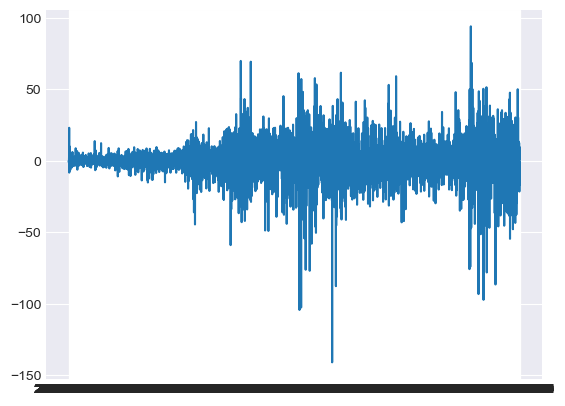

In [22]:
plt.plot(residuals)

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (18,10))
plt.plot(df['Open'])
plt.plot(df['Close'])
plt.legend(['Open','Close'])
plt.title('Open and Close Prices')

KeyError: 'Open'

<Figure size 1800x1000 with 0 Axes>

In [24]:
plt.figure(figsize = (18,10))
plt.plot(df['High'])
plt.plot(df['Low'])
plt.legend(['High','Low'])
plt.title('High and Low Prices of Gold', fontsize =20)

KeyError: 'High'

<Figure size 1800x1000 with 0 Axes>

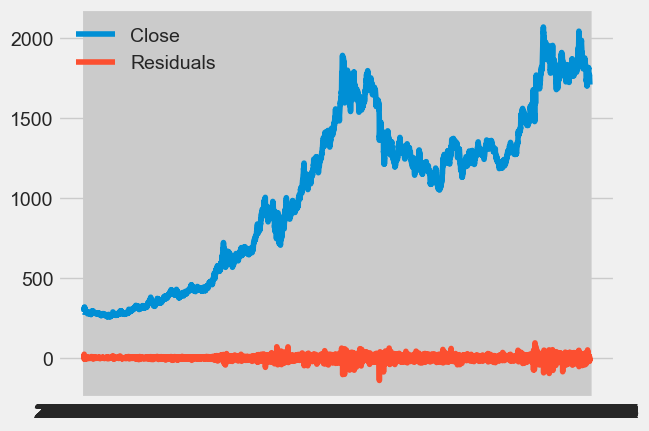

In [25]:
plt.plot(df['Close'])
plt.plot(residuals)
plt.legend(['Close','Residuals'])

In [26]:
df['PriceDiff'] = df['Close'].shift(-1) - df['Close']
df = df.dropna()
print(df['PriceDiff'])

Date
2000-01-27    -1.1
2000-01-28     0.2
2000-01-31    -0.8
2000-02-01     2.3
2000-02-02     2.2
              ... 
2022-08-25   -21.6
2022-08-26    -0.1
2022-08-29   -13.4
2022-08-30   -10.1
2022-08-31   -16.9
Name: PriceDiff, Length: 5685, dtype: float64


Text(0.5, 1.0, 'Price Difference and Close Price of Gold')

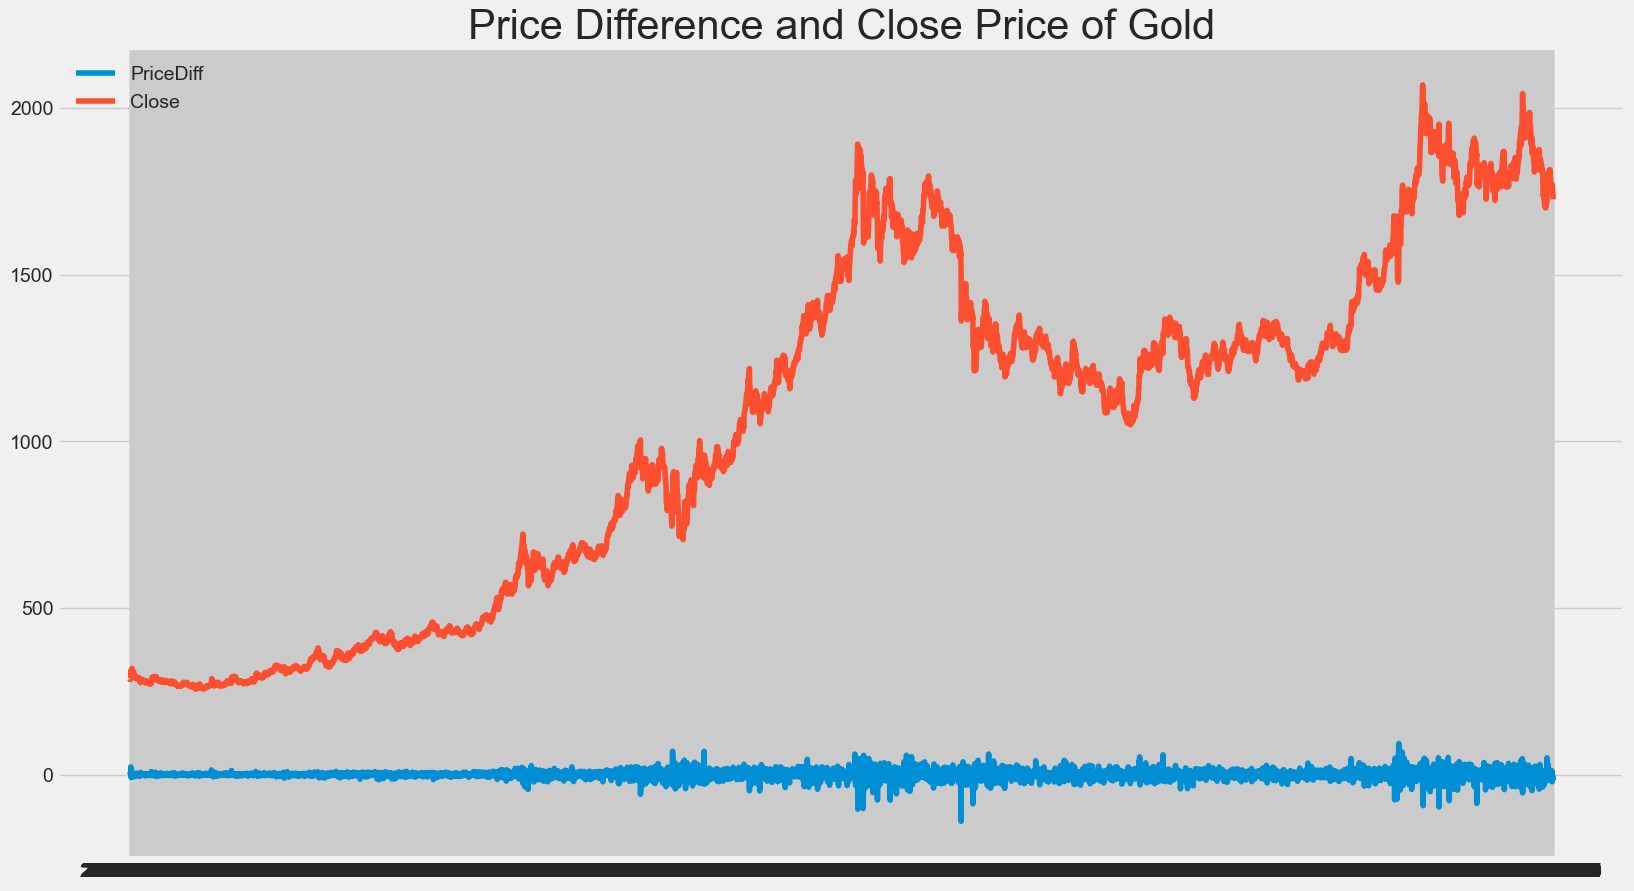

In [27]:
plt.figure(figsize = (18,10))
plt.plot(df['PriceDiff'])
plt.plot(df['Close'])
plt.legend(['PriceDiff','Close'])
plt.title('Price Difference and Close Price of Gold',fontsize = 30)

In [28]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()

C:\Users\devbu\AppData\Local\Temp\ipykernel_16676\1912615136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA10'] = df['Close'].rolling(10).mean()
C:\Users\devbu\AppData\Local\Temp\ipykernel_16676\1912615136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA50'] = df['Close'].rolling(50).mean()


In [29]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [30]:
print(adf_test(df['High']))

KeyError: 'High'

In [31]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)


In [32]:
kpss_test(df['High'])

KeyError: 'High'

In [33]:
df['High_diff'] = df['High'] - df['High'].shift(1)
df['High_diff'].dropna().plot(figsize = (20,10))

KeyError: 'High'

In [34]:
kpss_test(df['High_diff'].dropna())

KeyError: 'High_diff'

In [35]:
adf_test(df['High_diff'].dropna())

KeyError: 'High_diff'

In [36]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import math
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


#Create a new dataframe with only the "Close column"
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)

training_data_len

4548

In [37]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0168248 ],
       [0.01621801],
       [0.01632833],
       ...,
       [0.82364298],
       [0.8162511 ],
       [0.81067961]])

In [38]:
#create the training data set

#Create the scaled training data set

train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []

y_train = []

for i in range(60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:

        print(x_train)
        print(y_train)
        print()

[array([0.0168248 , 0.01621801, 0.01632833, 0.01588703, 0.01715578,
       0.01836937, 0.03111209, 0.02642321, 0.02487864, 0.02868491,
       0.0342564 , 0.03144307, 0.03000883, 0.02620256, 0.02669903,
       0.02603707, 0.02796778, 0.02818844, 0.02526478, 0.02443733,
       0.02096205, 0.02074139, 0.02074139, 0.02024492, 0.01825905,
       0.01859003, 0.01809356, 0.02046558, 0.01864519, 0.01991395,
       0.01842454, 0.01925199, 0.01825905, 0.01820388, 0.01676964,
       0.01566637, 0.01649382, 0.01864519, 0.01748676, 0.01588703,
       0.01572154, 0.01318402, 0.01263239, 0.01064651, 0.01241174,
       0.01368049, 0.01312886, 0.01654898, 0.01500441, 0.01439762,
       0.01428729, 0.01511474, 0.01494925, 0.01483892, 0.01467343,
       0.01544572, 0.01522507, 0.01456311, 0.01428729, 0.01373566])]
[0.01357016769638128]



In [39]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [40]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4488, 60, 1)

In [41]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))

model.add(Dense(25))

model.add(Dense(1))

In [42]:
#Compile the model
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [43]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=22)

Epoch 1/22
4488/4488 [==============================] - 88s 19ms/step - loss: 7.2185e-04
Epoch 2/22
4488/4488 [==============================] - 87s 19ms/step - loss: 2.4993e-04
Epoch 3/22
4488/4488 [==============================] - 91s 20ms/step - loss: 1.6869e-04
Epoch 4/22
4488/4488 [==============================] - 90s 20ms/step - loss: 1.4841e-04
Epoch 5/22
4488/4488 [==============================] - 90s 20ms/step - loss: 1.4065e-04
Epoch 6/22
4488/4488 [==============================] - 89s 20ms/step - loss: 1.3926e-04
Epoch 7/22
4488/4488 [==============================] - 89s 20ms/step - loss: 1.2171e-04
Epoch 8/22
4488/4488 [==============================] - 86s 19ms/step - loss: 1.1639e-04
Epoch 9/22
4488/4488 [==============================] - 93s 21ms/step - loss: 1.1710e-04
Epoch 10/22
4488/4488 [==============================] - 88s 20ms/step - loss: 1.1307e-04
Epoch 11/22
4488/4488 [==============================] - 84s 19ms/step - loss: 1.0716e-04
Epoch 12/22
4488/44

In [44]:
#Create the testing data set

#Create a new array containing scaled values from index 4502 to 2003

test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x test and y_test

x_test = []

y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [45]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [46]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [47]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

36/36 [==============================] - 1s 12ms/step


In [48]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test )**2)
rmse

7.004635000103065

C:\Users\devbu\AppData\Local\Temp\ipykernel_16676\182942812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


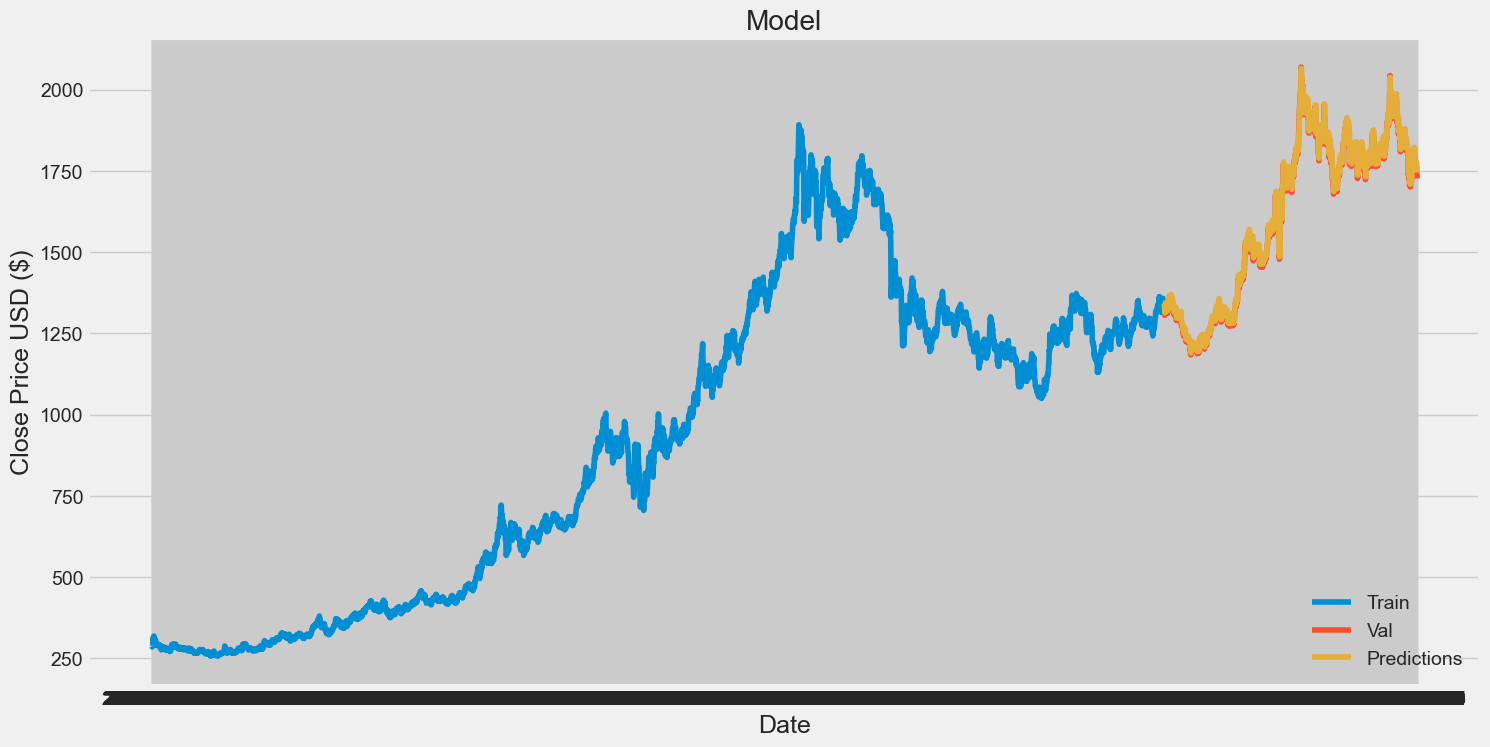

In [49]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len: ]

valid['Predictions'] = predictions

#Visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel( 'Date', fontsize=18)
plt.ylabel( 'Close Price USD ($)', fontsize=18)
plt.plot(train[ 'Close' ])
plt.plot(valid[[ 'Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [50]:
#Show the and predicted prices
valid

,Close,Predictions
Date,,
2018-02-27,1318.6,1341.404541
2018-02-28,1317.9,1326.752075
2018-03-01,1305.2,1325.993408
2018-03-02,1323.4,1312.958862
2018-03-05,1319.9,1331.840820
...,...,...
2022-08-25,1771.4,1768.828369
2022-08-26,1749.8,1778.159302
2022-08-29,1749.7,1758.106812
